In [62]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

## Loading Model

In [63]:
model = tf.keras.models.load_model('Plant_disease_trained_model.keras')

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 70)                  │         105,070 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,781,590 (60.20 MB)

 Trainable params: 7,890,794 (30.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,890,796 (30.10 MB)

## Visualizing Single Image of Test Set

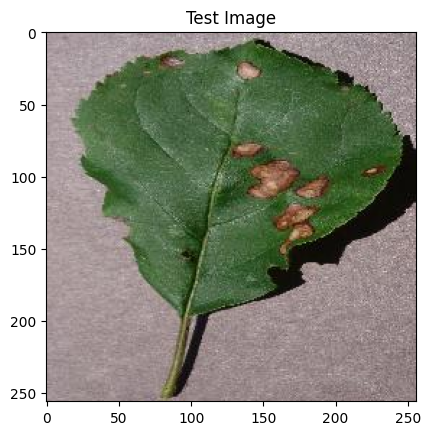

In [65]:
import cv2
image_path = "Plant disease dataset/test/Apple__black_rot/032cf235-07ff-478f-b347-d55c07835bc5___JR_FrgE.S 8778.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Displaying Image 
plt.imshow(img)
plt.title("Test Image")
plt.show()

## Testing Model

In [66]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [67]:
# Define class names
class_name = ['Apple__black_rot', 'Apple__healthy', 'Apple__rust', 'Apple__scab', 
              'Cassava__bacterial_blight', 'Cassava__brown_streak_disease', 'Cassava__green_mottle', 
              'Cassava__healthy', 'Cassava__mosaic_disease', 'Cherry__healthy', 'Cherry__powdery_mildew',
              'Corn__common_rust', 'Corn__gray_leaf_spot', 'Corn__healthy', 'Corn__northern_leaf_blight', 
              'Cucumber__diseased', 'Cucumber__healthy', 'Gauva__diseased', 'Gauva__healthy', 'Grape__black_measles', 
              'Grape__black_rot', 'Grape__healthy', 'Grape__leaf_blight', 'Jamun__diseased', 'Jamun__healthy', 
              'Mango__diseased', 'Mango__healthy', 'Peach__bacterial_spot', 'Peach__healthy', 'Pepper_bell__bacterial_spot', 
              'Pepper_bell__healthy', 'Pomegranate__diseased', 'Pomegranate__healthy', 'Potato__early_blight', 
              'Potato__healthy', 'Potato__late_blight', 'Rice__brown_spot', 'Rice__healthy', 'Rice__hispa', 
              'Rice__leaf_blast', 'Rice__neck_blast', 'Soybean__caterpillar', 'Soybean__diabrotica_speciosa', 
              'Soybean__healthy', 'Strawberry___leaf_scorch', 'Strawberry__healthy', 'Sugarcane__bacterial_blight', 
              'Sugarcane__healthy', 'Sugarcane__red_rot', 'Sugarcane__red_stripe', 'Sugarcane__rust', 'Tea__algal_leaf', 
              'Tea__anthracnose', 'Tea__bird_eye_spot', 'Tea__brown_blight', 'Tea__healthy', 'Tea__red_leaf_spot', 
              'Tomato__bacterial_spot', 'Tomato__early_blight', 'Tomato__healthy', 'Tomato__late_blight', 
              'Tomato__leaf_mold', 'Tomato__mosaic_virus', 'Tomato__septoria_leaf_spot', 'Tomato__spider_mites', 
              'Tomato__target_spot', 'Tomato__yellow_leaf_curl_virus', 'Wheat__brown_rust', 'Wheat__healthy', 
              'Wheat__yellow_rust']

In [68]:
disease_info = {
    "Apple__black_rot": {
        "description": "Black rot is a fungal disease that causes circular black spots on leaves and fruits. It eventually leads to fruit rot and defoliation.",
        "cure": "Prune infected branches, remove fallen leaves, and apply a fungicide containing copper or thiophanate-methyl."
    },
    "Apple__healthy": {
        "description": "The plant is healthy with no visible signs of disease or pest infestation.",
        "cure": "Maintain proper irrigation and nutrient levels to sustain plant health."
    },
    "Apple__rust": {
        "description": "Rust is a fungal disease that forms orange or yellow spots on apple leaves, reducing fruit quality.",
        "cure": "Remove nearby juniper plants (the alternate host), apply fungicides, and ensure good air circulation."
    },
    "Apple__scab": {
        "description": "Scab is a fungal disease that causes dark, rough patches on apple fruit and leaves.",
        "cure": "Apply sulfur- or copper-based fungicides and plant resistant apple varieties."
    },
    "Cassava__bacterial_blight": {
        "description": "Bacterial blight causes wilting, yellowing, and leaf drop in cassava plants.",
        "cure": "Use disease-free planting material, practice crop rotation, and apply bactericides if needed."
    },
    "Cassava__brown_streak_disease": {
        "description": "This viral disease leads to brown streaks on stems and rotting of tubers, reducing yield.",
        "cure": "Use virus-free planting materials and resistant varieties to prevent infection."
    },
    "Cassava__green_mottle": {
        "description": "This disease affects cassava leaves, causing mottling and deformation.",
        "cure": "Plant resistant varieties and ensure proper pest control."
    },
    "Cassava__healthy": {
        "description": "The cassava plant is healthy and free from disease.",
        "cure": "Maintain good field hygiene and proper fertilization."
    },
    "Cassava__mosaic_disease": {
        "description": "A viral disease causing mosaic-like patterns on cassava leaves, leading to stunted growth.",
        "cure": "Use resistant varieties and control whiteflies, which spread the virus."
    },
    "Cherry__healthy": {
        "description": "The cherry plant is in good health with no signs of disease.",
        "cure": "Regular monitoring and proper care ensure continued health."
    },
    "Cherry__powdery_mildew": {
        "description": "Powdery mildew is a fungal infection that causes white powdery spots on leaves and fruit.",
        "cure": "Apply sulfur-based fungicides and prune infected areas."
    },
    "Corn__common_rust": {
        "description": "Common rust in corn appears as reddish-brown pustules on leaves, reducing crop yield.",
        "cure": "Use resistant hybrids and apply fungicides like azoxystrobin if needed."
    },
    "Corn__gray_leaf_spot": {
        "description": "A fungal disease that causes elongated grayish lesions on leaves, leading to reduced photosynthesis.",
        "cure": "Rotate crops and apply fungicides containing strobilurins."
    },
    "Corn__healthy": {
        "description": "The corn plant is free from diseases and pests.",
        "cure": "Regular field inspection and good agronomic practices help maintain health."
    },
    "Corn__northern_leaf_blight": {
        "description": "This disease causes long, cigar-shaped lesions on corn leaves, reducing yield.",
        "cure": "Use resistant varieties and apply fungicides at early stages."
    },
    "Cucumber__diseased": {
        "description": "Cucumber plants are affected by fungal, bacterial, or viral diseases, leading to poor fruit production.",
        "cure": "Identify the disease type and apply appropriate fungicides, bactericides, or insecticides."
    },
    "Cucumber__healthy": {
        "description": "The cucumber plant is healthy with no signs of disease.",
        "cure": "Continue proper watering and fertilization to maintain health."
    },
    "Gauva__diseased": {
        "description": "A fungal or bacterial infection affecting guava plants.",
        "cure": "Prune infected branches and apply suitable fungicides."
    },
    "Gauva__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Maintain good soil conditions and proper fertilization."
    },
    "Grape__black_measles": {
        "description": "A fungal disease that causes dark spots on leaves and fruit.",
        "cure": "Prune affected areas and apply fungicides."
    },
    "Grape__black_rot": {
        "description": "A fungal disease causing black spots on leaves and fruit decay.",
        "cure": "Remove infected leaves and apply fungicides."
    },
    "Grape__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Ensure proper pruning and pest control."
    },
    "Grape__leaf_blight": {
        "description": "A bacterial or fungal infection causing leaf spots and blight.",
        "cure": "Use bactericides or fungicides and remove infected parts."
    },
    "Jamun__diseased": {
        "description": "A fungal or bacterial infection affecting Jamun plants.",
        "cure": "Apply appropriate fungicides or bactericides and prune affected areas."
    },
    "Jamun__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Maintain adequate irrigation and nutrient supply."
    },
    "Mango__diseased": {
        "description": "A fungal or bacterial infection affecting Mango trees, leading to leaf spots or fruit rot.",
        "cure": "Prune affected branches, apply fungicides, and ensure proper air circulation."
    },
    "Mango__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Ensure proper watering, fertilization, and pest control."
    },
    "Pomegranate__diseased": {
        "description": "A fungal or bacterial infection affecting Pomegranate trees, leading to fruit rot or leaf spots.",
        "cure": "Remove infected leaves and apply suitable fungicides."
    },
    "Pomegranate__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Maintain good soil health and regular monitoring."
    },
    "Potato__early_blight": {
        "description": "A fungal disease causing brown spots with concentric rings on leaves.",
        "cure": "Apply fungicides and remove infected foliage."
    },
    "Potato__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Ensure proper irrigation and balanced fertilization."
    },
    "Potato__late_blight": {
        "description": "A fungal disease causing water-soaked lesions on leaves and tubers.",
        "cure": "Use fungicides and practice crop rotation."
    },
    "Rice__brown_spot": {
        "description": "A fungal disease causing brown spots on leaves, affecting grain yield.",
        "cure": "Apply balanced fertilizers and fungicides if necessary."
    },
    "Rice__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Maintain good soil health and proper irrigation."
    },
    "Rice__hispa": {
        "description": "A pest infestation causing leaf damage and reduced yield.",
        "cure": "Use biological control agents and insecticides if required."
    },
    "Rice__leaf_blast": {
        "description": "A fungal disease causing elongated lesions and leaf drying.",
        "cure": "Apply resistant varieties and appropriate fungicides."
    },
    "Rice__neck_blast": {
        "description": "A severe fungal infection affecting the neck of the rice panicle, causing grain loss.",
        "cure": "Use resistant varieties, apply fungicides, and ensure proper fertilization."
    },
     "Soybean__caterpillar": {
        "description": "A pest infestation that feeds on soybean leaves and reduces yield.",
        "cure": "Use biological or chemical insecticides to control caterpillars."
    },
    "Soybean__diabrotica_speciosa": {
        "description": "A beetle infestation causing damage to roots and foliage.",
        "cure": "Apply insecticides and use crop rotation to reduce pest impact."
    },
    "Soybean__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Ensure proper pest control and fertilization."
    },
    "Sugarcane__bacterial_blight": {
        "description": "A bacterial infection causing water-soaked lesions and yellowing of leaves.",
        "cure": "Use disease-free planting material, remove infected plants, and apply bactericides."
    },
    "Sugarcane__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Ensure proper irrigation, fertilization, and pest management."
    },
    "Sugarcane__red_rot": {
        "description": "A fungal disease that causes reddening of the stalk, wilting, and reduced sugar content.",
        "cure": "Remove and burn infected plants, use resistant varieties, and apply fungicides."
    },
    "Sugarcane__red_stripe": {
        "description": "A bacterial disease causing red streaks on leaves and stunted growth.",
        "cure": "Use resistant varieties, maintain field sanitation, and apply appropriate bactericides."
    },
    "Sugarcane__rust": {
        "description": "A fungal disease that forms orange to brown pustules on leaves, reducing photosynthesis.",
        "cure": "Use resistant varieties and apply fungicides if necessary."
    },
    "Tea__algal_leaf": {
        "description": "A disease caused by algae, leading to circular greenish-brown spots on leaves.",
        "cure": "Improve field drainage, remove infected leaves, and apply copper-based fungicides."
    },
    "Tea__anthracnose": {
        "description": "A fungal disease causing sunken, dark lesions on leaves and stems.",
        "cure": "Prune infected parts, improve air circulation, and apply fungicides."
    },
    "Tea__bird_eye_spot": {
        "description": "A fungal infection that creates small brown lesions with a pale center, resembling bird eyes.",
        "cure": "Apply copper-based fungicides and remove affected leaves."
    },
    "Tea__brown_blight": {
        "description": "A fungal disease that causes browning and blight of leaves.",
        "cure": "Improve field hygiene, remove infected leaves, and apply fungicides."
    },
    "Tea__healthy": {
        "description": "No disease detected. The plant appears to be in good health.",
        "cure": "Maintain proper soil health, irrigation, and pest control."
    },
    "Tea__red_leaf_spot": {
        "description": "A fungal disease causing reddish-brown spots on leaves, leading to defoliation.",
        "cure": "Use resistant varieties, apply fungicides, and maintain proper pruning practices."
    },
    "Tomato__bacterial_spot": {
        "description": "A bacterial disease that causes small, water-soaked spots on tomato leaves and fruits.",
        "cure": "Apply copper-based bactericides and avoid overhead irrigation."
    },
    "Tomato__early_blight": {
        "description": "A fungal disease causing dark, concentric rings on tomato leaves and fruit.",
        "cure": "Apply fungicides like chlorothalonil and ensure proper spacing between plants."
    },
    "Tomato__healthy": {
        "description": "The tomato plant is disease-free and in good condition.",
        "cure": "Regular monitoring and proper nutrient management keep the plant healthy."
    },
    "Tomato__late_blight": {
        "description": "Late blight is a severe fungal disease causing large, dark lesions on tomato leaves and fruit.",
        "cure": "Use resistant varieties and apply copper-based fungicides."
    },
    "Tomato__leaf_mold": {
        "description": "Leaf mold is a fungal disease that forms yellow spots on tomato leaves, reducing yield.",
        "cure": "Ensure good air circulation and apply fungicides if needed."
    },
    "Tomato__mosaic_virus": {
        "description": "A viral disease that causes mottling, curling, and deformation of tomato leaves.",
        "cure": "Use virus-free seeds and control aphid vectors to prevent spread."
    },
    "Wheat__brown_rust": {
        "description": "Brown rust is a fungal disease that causes reddish-brown pustules on wheat leaves, reducing yield.",
        "cure": "Apply fungicides such as triazoles and plant resistant wheat varieties."
    },
    "Wheat__healthy": {
        "description": "The wheat crop is free from disease and pests.",
        "cure": "Good farming practices and disease monitoring help maintain health."
    },
    "Wheat__yellow_rust": {
        "description": "A fungal disease that causes yellow pustules on wheat leaves, affecting grain production.",
        "cure": "Apply systemic fungicides and grow resistant wheat varieties."
    }
}


In [69]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


(array([[9.9926955e-01, 1.4615851e-05, 1.7426644e-05, 5.9280745e-07,
         1.2582043e-06, 7.4327698e-07, 4.7499711e-06, 5.0657636e-06,
         2.7087575e-08, 3.7237182e-06, 1.8892440e-08, 6.0861318e-08,
         6.7273596e-08, 1.1395988e-11, 1.7299615e-06, 1.2866255e-09,
         2.3982748e-08, 5.8532686e-11, 3.2858823e-13, 2.9303964e-08,
         7.3010568e-05, 1.0454511e-06, 8.6133722e-12, 2.8627836e-10,
         3.0173825e-10, 1.2082307e-12, 9.5745585e-11, 1.6914379e-06,
         7.7229334e-09, 2.0245252e-04, 4.9138805e-07, 6.4954619e-10,
         2.9437092e-10, 6.2099057e-06, 1.1248597e-08, 1.9098501e-04,
         1.7503261e-09, 3.9333692e-09, 6.7667927e-11, 1.1691581e-08,
         5.0520704e-08, 3.0240169e-08, 3.5549741e-09, 6.8804388e-07,
         3.8563883e-08, 1.2863860e-07, 8.0764395e-11, 4.4888586e-07,
         2.3809097e-08, 3.3395843e-08, 3.0090089e-10, 5.1533205e-10,
         8.5593248e-09, 7.1617530e-09, 1.5337216e-09, 5.4585025e-10,
         7.5474647e-11, 2.2717373e

In [70]:
result_index = np.argmax(prediction)
result_index

0

In [73]:

# Get predicted disease
predicted_disease = class_name[result_index]

In [74]:
# Get disease details
description = disease_info.get(predicted_disease, {}).get("description", "No description available.")
cure = disease_info.get(predicted_disease, {}).get("cure", "No cure information available.")

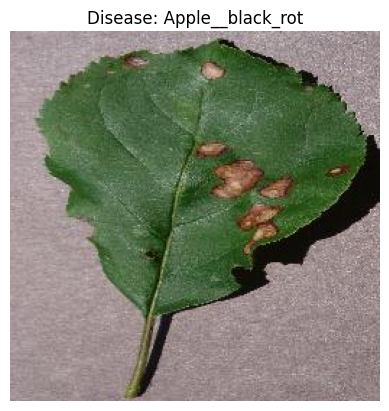

Predicted Disease: Apple__black_rot
Description: Black rot is a fungal disease that causes circular black spots on leaves and fruits. It eventually leads to fruit rot and defoliation.
Cure: Prune infected branches, remove fallen leaves, and apply a fungicide containing copper or thiophanate-methyl.


In [75]:
# Display the results
plt.imshow(img)
plt.title(f"Disease: {predicted_disease}")
plt.axis("off")
plt.show()

print(f"Predicted Disease: {predicted_disease}")
print(f"Description: {description}")
print(f"Cure: {cure}")